In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

In [3]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
df = pd.read_csv(r'Data Carrard et al 2022 MedTeach.csv')

In [7]:
codebook = pd.read_csv(r'Codebook Carrard et al. 2022 MedTeach.csv', sep=';')

In [8]:
codebook.head(5)

,Variable Name,Variable Label,Variable Scale,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,id,Participants ID number,string,NaN,NaN,NaN
1,age,age at questionnaire 20-21,numeric,NaN,NaN,NaN
2,year,CURICULUM YEAR : In which curriculum year are ...,1=Bmed1; 2=Bmed2; 3=Bmed3; 4=Mmed1; 5=Mmed2; 6...,NaN,NaN,NaN
3,sex,GENDER : To which gender do you identify the m...,1=Man; 2=Woman; 3=Non-binary,NaN,NaN,NaN
4,glang,MOTHER TONGUE: What is your mother tongue?,1=French; 15=German; 20=English; 37=Arab; 51=B...,NaN,NaN,NaN


In [9]:
def create_groups(value):
    cleaned = [i.strip(" ") for i in value.split(";")]
    grouped_dict = dict()
    for i in cleaned:
        div = i.split("=")
        grouped_dict[int(div[0])] = div[1]
    return grouped_dict

In [10]:
maps = dict()
columns = codebook.iloc[:, 0].values
ids = [2, 3, 4, 5, 6, 8, 9]
count = 0
for i in codebook.iloc[ids, 2]:
    maps[columns[ids[count]]] = create_groups(i)
    count += 1

In [11]:
maps

{'year': {1: 'Bmed1',
  2: 'Bmed2',
  3: 'Bmed3',
  4: 'Mmed1',
  5: 'Mmed2',
  6: 'Mmed3'},
 'sex': {1: 'Man', 2: 'Woman', 3: 'Non-binary'},
 'glang': {1: 'French',
  15: 'German',
  20: 'English',
  37: 'Arab',
  51: 'Basque',
  52: 'Bulgarian',
  53: 'Catalan',
  54: 'Chinese',
  59: 'Korean',
  60: 'Croatian',
  62: 'Danish',
  63: 'Spanish',
  82: 'Estonian',
  83: 'Finnish',
  84: 'Galician',
  85: 'Greek',
  86: 'Hebrew',
  87: 'Hindi',
  88: 'Hungarian',
  89: 'Indonesian',
  90: 'Italian',
  92: 'Japanese',
  93: 'Kazakh',
  94: 'Latvian',
  95: 'Lithuanian',
  96: 'Malay',
  98: 'Dutch',
  100: 'Norwegian',
  101: 'Polish',
  102: 'Portuguese',
  104: 'Romanian',
  106: 'Russian',
  108: 'Serbian',
  112: 'Slovak',
  113: 'Slovenian',
  114: 'Swedish',
  116: 'Czech',
  117: 'Thai',
  118: 'Turkish',
  119: 'Ukrainian',
  120: 'Vietnamese',
  121: 'Other'},
 'part': {0: 'No', 1: 'Yes'},
 'job': {0: 'No', 1: 'Yes'},
 'health': {1: 'Verydissatisfied',
  2: 'Dissatisfied',
  3: 

In [12]:
df.head(5)

,id,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea
0,2,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,34,61,17,13,20
1,4,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,7,33,14,11,26
2,9,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,25,73,24,7,23
3,10,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,17,48,16,10,21
4,13,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,14,46,22,14,23


In [13]:
df.shape

(886, 20)

In [14]:
df_classes = df.copy().iloc[:, ids]

In [15]:
for i in df_classes.columns:
    df_classes[i] = df_classes[i].map(maps[i])

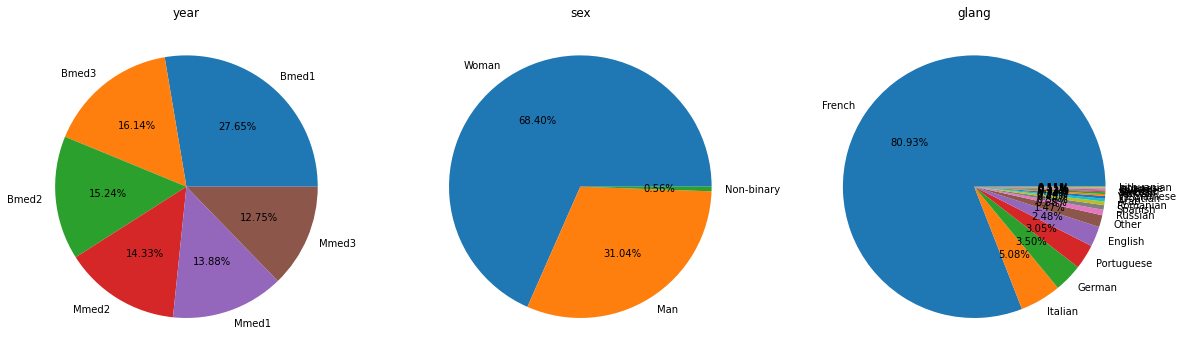

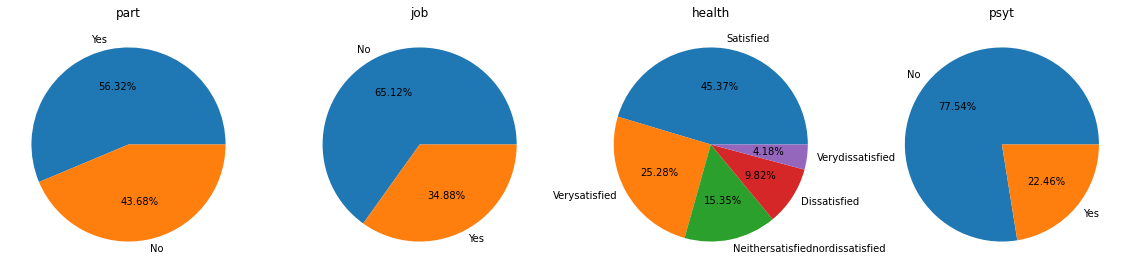

In [16]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 25))
cols = df_classes.columns
for i in range(0, 3):
    freqs = df_classes[cols[i]].value_counts()
    axes[i].pie(freqs, labels=freqs.index, autopct="%0.2f%%")
    axes[i].set_title(cols[i])
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(20, 25))
for i in range(3, df_classes.shape[1]):
    freqs = df_classes[cols[i]].value_counts()
    axes[i-3].pie(freqs, labels=freqs.index, autopct="%0.2f%%")
    axes[i-3].set_title(cols[i])

In [17]:
lang_freqs = df_classes['glang'].value_counts()
lang_freqs

French        717
Italian        45
German         31
Portuguese     27
English        22
Other          13
Russian         6
Spanish         5
Romanian        4
Arab            3
Croatian        3
Vietnamese      2
Turkish         2
Serbian         1
Swedish         1
Chinese         1
Dutch           1
Japanese        1
Lithuanian      1
Name: glang, dtype: int64

Mental health satisfaction among different groups

In [18]:
numerical = [1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

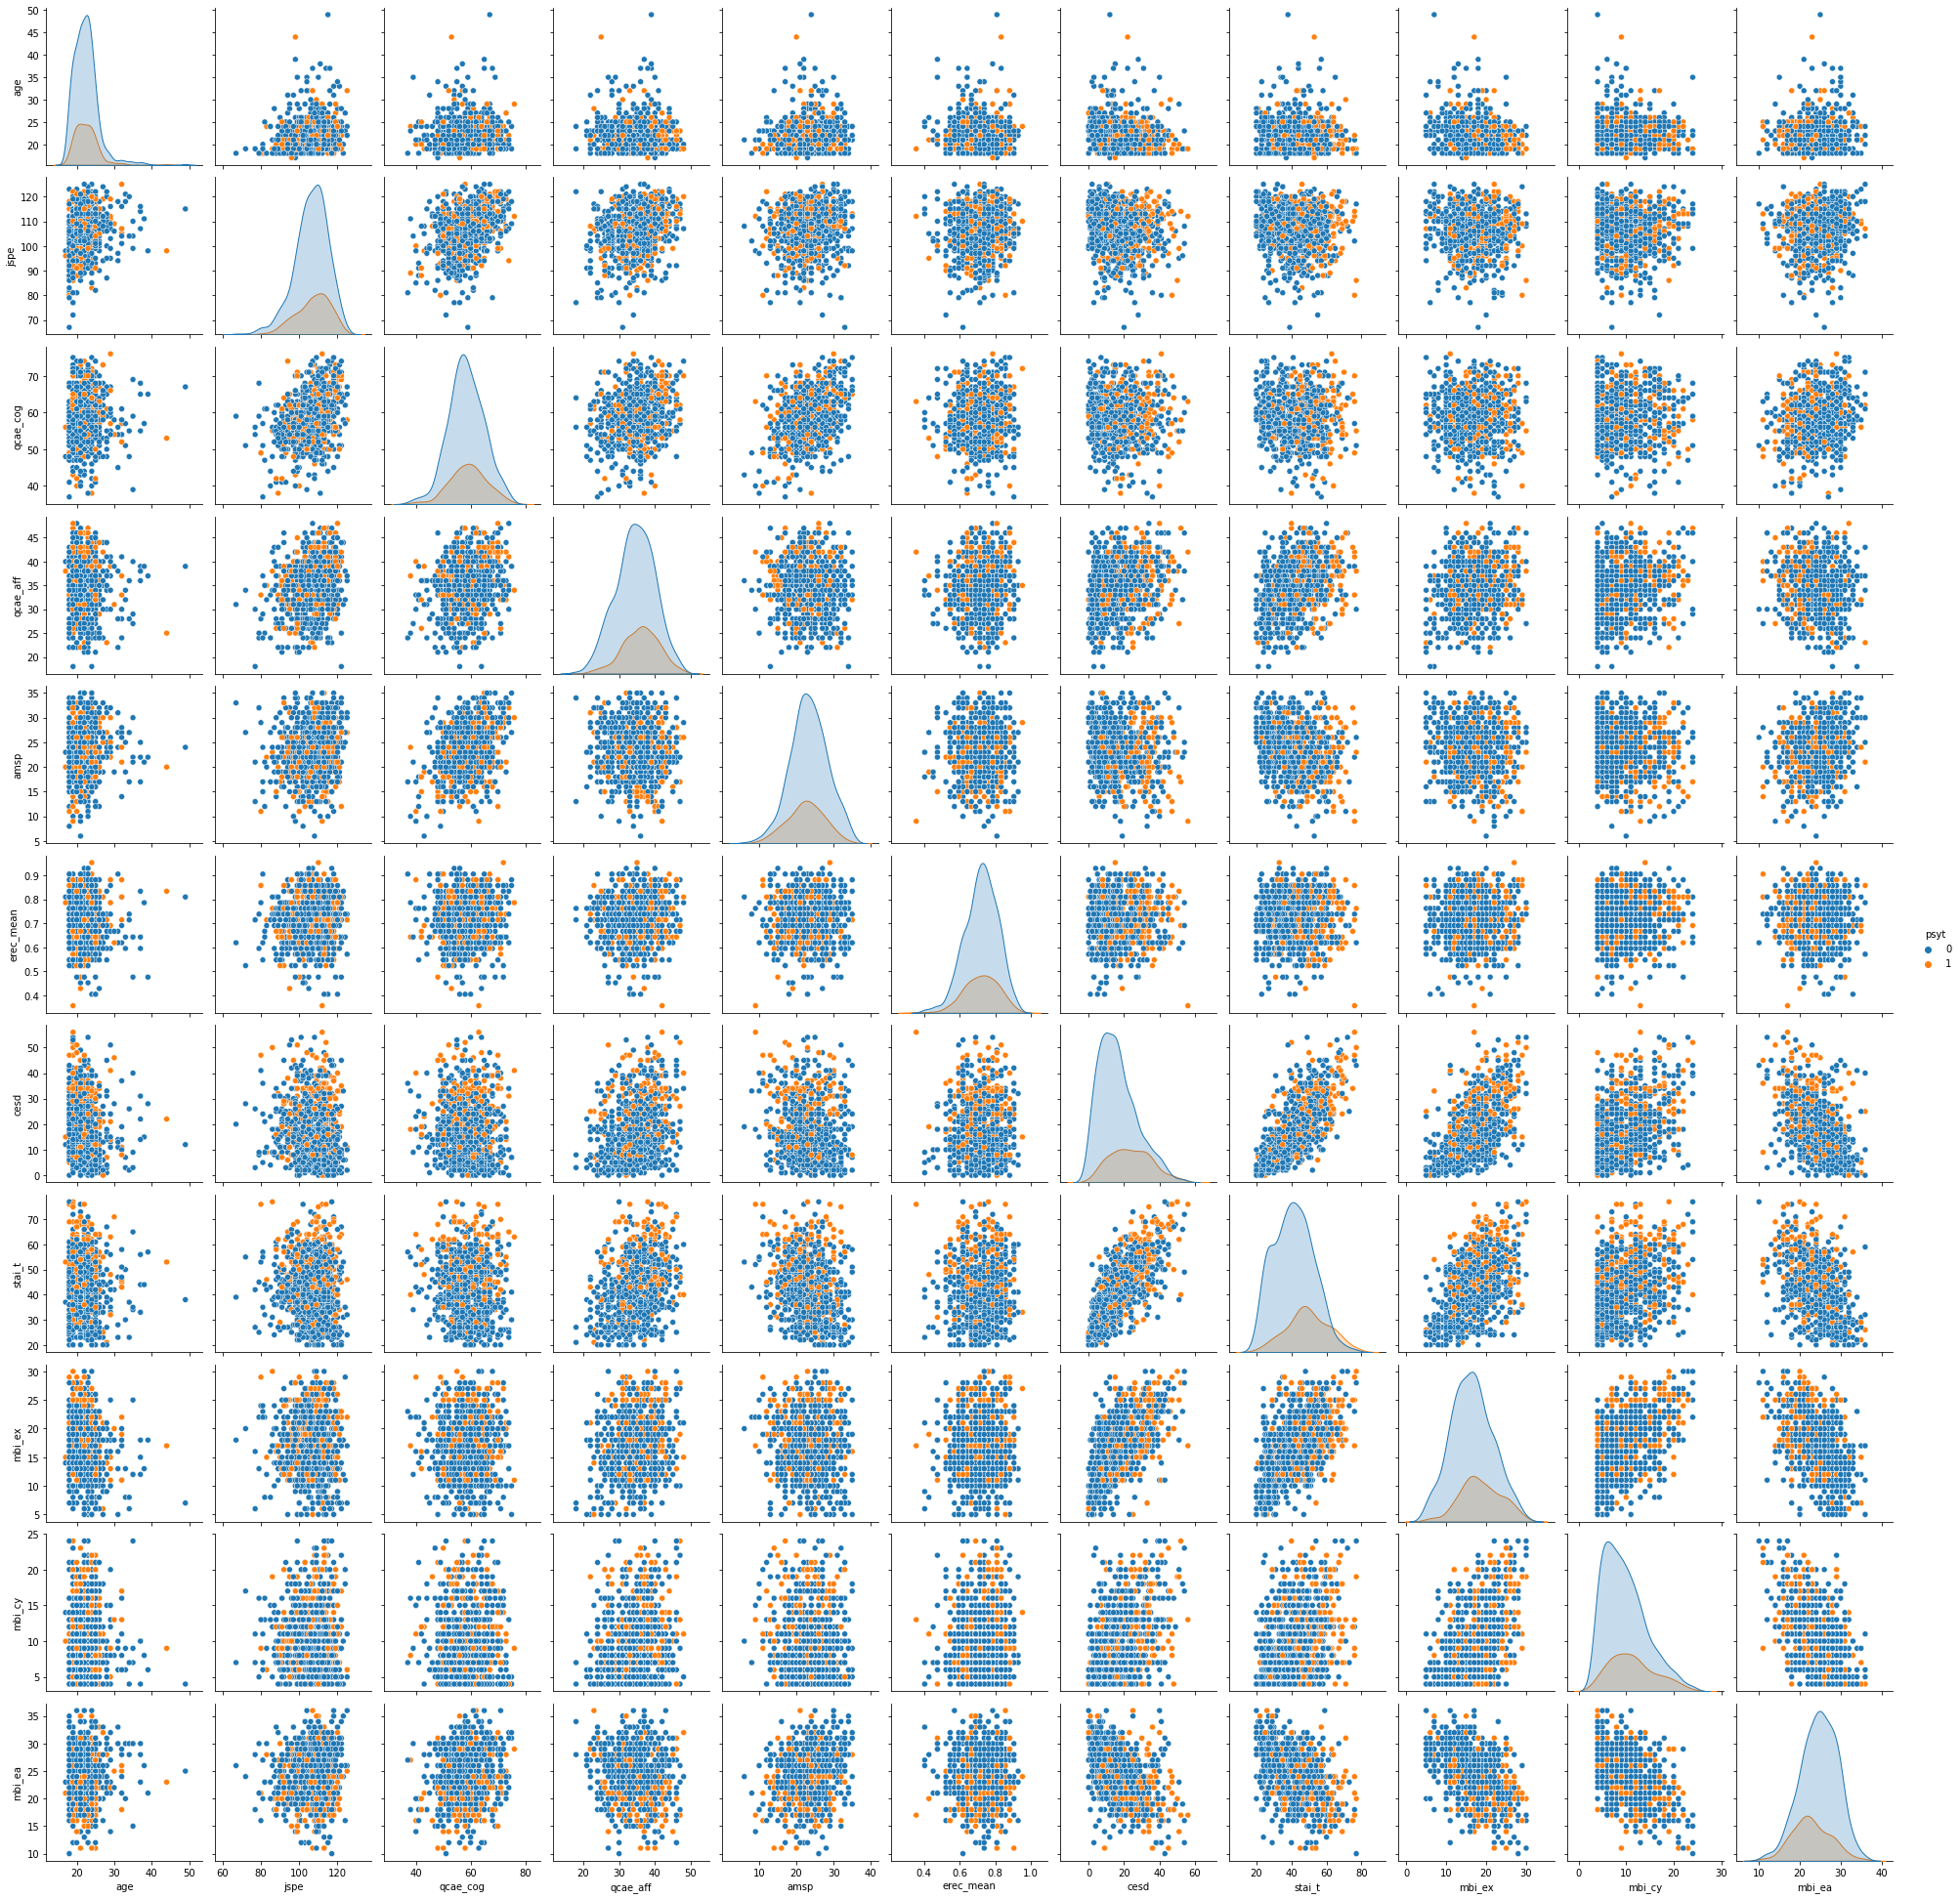

In [19]:
sns.pairplot(df, hue='psyt', vars=df.columns[numerical])

In [20]:
# Suggestion is to make a binary classification on whether student will take terapy or not, but the dataset is most likely to
# be unbalanced in that sense. Hence, we would need to later apply SMOTE technique or any other techniques to balanced the 
# dataset in a sense of classes
# First, we will apply tree structures and gaussianNB, that work with categorical and numerical input just fine.
# Then, we will apply techniques for numerical input: LogisticRegression, SVMs and KNN
# After that we will only apply tree structures and GaussianNB for only categorical input
# After that I will perform some benchmarks and comparison of SGDClassifier of sklearn and classifier written in PyTorch

In [21]:
def model_evaluation(model, test_sample, truth, categorical=True):
    yhat = model.predict(test_sample)
    score = accuracy_score(yhat, truth)
    text = "Accuracy score for the model {}%".format(round(score*100, 2))
    if categorical:
        cm = confusion_matrix(yhat, truth)
        sns.heatmap(cm, annot=True)
        plt.title(text)
    else:
        dd = dict()
        for i in range(test_sample.shape[1]):
            name = "data:{}".format(i)
            dd[name] = test_sample[:, i]
#         dd['target'] = truth
        dd['predicted'] = yhat
        print(text)
        df = pd.DataFrame(dd)
#         fig, axes = plt.subplots(nrows=2, ncols=1)
        sns.pairplot(df, hue='predicted', vars=df.columns[:-1])
        plt.title(text)
        plt.show()

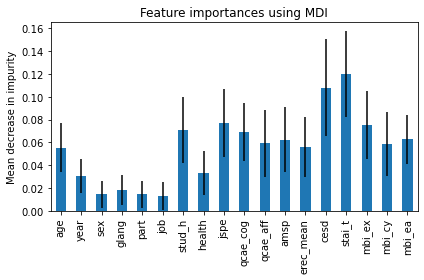

In [22]:
temp = [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
X = df.iloc[:, temp].values
y = df.iloc[:, 9].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
# ids[:-1]+numerical
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(forest.feature_importances_, index=df.columns[temp])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [23]:
selected_cols = ['age', 'stud_h', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'mbi_ex', 'mbi_cy', 'mbi_ea']
x = df.loc[:, selected_cols]
y = df.loc[:, 'psyt']
oversample = SMOTE()
x_all, y_all = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, random_state=42, test_size=0.2)

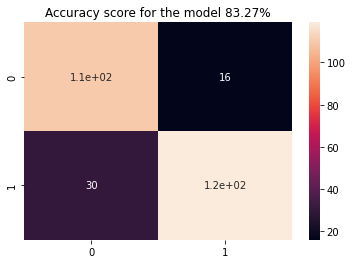

In [24]:
rfc = RandomForestClassifier(max_depth=50, max_features='sqrt')
rfc.fit(x_train, y_train)
model_evaluation(rfc, x_test, y_test)

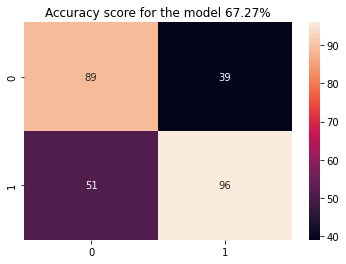

In [25]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
model_evaluation(gnb, x_test, y_test)

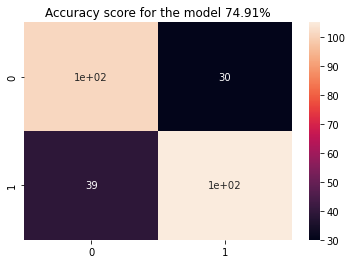

In [26]:
dtc = DecisionTreeClassifier(max_depth=50, max_features="sqrt")
dtc.fit(x_train, y_train)
model_evaluation(dtc, x_test, y_test)